In [1]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Read the data
X_train_full = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

X_train_full.head(10).T

0         1           2           3          4         5  \
Time      0.000000  0.000000    1.000000    1.000000   2.000000  2.000000   
V1       -1.359807  1.191857   -1.358354   -0.966272  -1.158233 -0.425966   
V2       -0.072781  0.266151   -1.340163   -0.185226   0.877737  0.960523   
V3        2.536347  0.166480    1.773209    1.792993   1.548718  1.141109   
V4        1.378155  0.448154    0.379780   -0.863291   0.403034 -0.168252   
V5       -0.338321  0.060018   -0.503198   -0.010309  -0.407193  0.420987   
V6        0.462388 -0.082361    1.800499    1.247203   0.095921 -0.029728   
V7        0.239599 -0.078803    0.791461    0.237609   0.592941  0.476201   
V8        0.098698  0.085102    0.247676    0.377436  -0.270533  0.260314   
V9        0.363787 -0.255425   -1.514654   -1.387024   0.817739 -0.568671   
V10       0.090794 -0.166974    0.207643   -0.054952   0.753074 -0.371407   
V11      -0.551600  1.612727    0.624501   -0.226487  -0.822843  1.341262   
V12      -0.617801  1.065235    0.066084    0.178228   0.538196  0.359894   
V13      -0.991390  0.489095    0.717293    0.507757   1.345852 -0.358091   
V14      -0.311169 -0.143772   -0.165946   -0.287924  -1.119670 -0.137134   
V15       1.468177  0.635558    2.345865   -0.631418   0.175121  0.517617   
V16      -0.470401  0.463917   -2.890083   -1.059647  -0.451449  0.401726   
V17       0.207971 -0.114805    1.109969   -0.684093  -0.237033 -0.058133   
V18       0.025791 -0.183361   -0.121359    1.965775  -0.038195  0.068653   
V19       0.403993 -0.145783   -2.261857   -1.232622   0.803487 -0.033194   
V20       0.251412 -0.069083    0.524980   -0.208038   0.408542  0.084968   
V21      -0.018307 -0.225775    0.247998   -0.108300  -0.009431 -0.208254   
V22       0.277838 -0.638672    0.771679    0.005274   0.798278 -0.559825   
V23      -0.110474  0.101288    0.909412   -0.190321  -0.137458 -0.026398   
V24       0.066928 -0.339846   -0.689281   -1.175575   0.141267 -0.371427   
V25       0.128539  0.167170   -0.327642    0.647376  -0.206010 -0.232794   
V26      -0.189115  0.125895   -0.139097   -0.221929   0.502292  0.105915   
V27       0.133558 -0.008983   -0.055353    0.062723   0.219422  0.253844   
V28      -0.021053  0.014724   -0.059752    0.061458   0.215153  0.081080   
Amount  149.620000  2.690000  378.660000  123.500000  69.990000  3.670000   
Class     0.000000  0.000000    0.000000    0.000000   0.000000  0.000000   

               6          7          8         9  
Time    4.000000   7.000000   7.000000  9.000000  
V1      1.229658  -0.644269  -0.894286 -0.338262  
V2      0.141004   1.417964   0.286157  1.119593  
V3      0.045371   1.074380  -0.113192  1.044367  
V4      1.202613  -0.492199  -0.271526 -0.222187  
V5      0.191881   0.948934   2.669599  0.499361  
V6      0.272708   0.428118   3.721818 -0.246761  
V7     -0.005159   1.120631   0.370145  0.651583  
V8      0.081213  -3.807864   0.851084  0.069539  
V9      0.464960   0.615375  -0.392048 -0.736727  
V10    -0.099254   1.249376  -0.410430 -0.366846  
V11    -1.416907  -0.619468  -0.705117  1.017614  
V12    -0.153826   0.291474  -0.110452  0.836390  
V13    -0.751063   1.757964  -0.286254  1.006844  
V14     0.167372  -1.323865   0.074355 -0.443523  
V15     0.050144   0.686133  -0.328783  0.150219  
V16    -0.443587  -0.076127  -0.210077  0.739453  
V17     0.002821  -1.222127  -0.499768 -0.540980  
V18    -0.611987  -0.358222   0.118765  0.476677  
V19    -0.045575   0.324505   0.570328  0.451773  
V20    -0.219633  -0.156742   0.052736  0.203711  
V21    -0.167716   1.943465  -0.073425 -0.246914  
V22    -0.270710  -1.015455  -0.268092 -0.633753  
V23    -0.154104   0.057504  -0.204233 -0.120794  
V24    -0.780055  -0.649709   1.011592 -0.385050  
V25     0.750137  -0.415267   0.373205 -0.069733  
V26    -0.257237  -0.051634  -0.384157  0.094199  
V27     0.034507  -1.206921   0.011747  0.246219  
V28     0.005168  -1.085339   0.142404  0.083076  
Amount  4.990000  40.8

In [2]:
quantiles = [0.01, 0.50, 0.99]
X_train_full.describe(quantiles).T

count          mean           std         min           1%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  2422.000000   
V1      284807.0  3.918649e-15      1.958696  -56.407510    -6.563199   
V2      284807.0  5.682686e-16      1.651309  -72.715728    -4.960300   
V3      284807.0 -8.761736e-15      1.516255  -48.325589    -3.978377   
V4      284807.0  2.811118e-15      1.415869   -5.683171    -3.122987   
V5      284807.0 -1.552103e-15      1.380247 -113.743307    -3.060396   
V6      284807.0  2.040130e-15      1.332271  -26.160506    -2.124023   
V7      284807.0 -1.698953e-15      1.237094  -43.557242    -3.012847   
V8      284807.0 -1.893285e-16      1.194353  -73.216718    -4.033899   
V9      284807.0 -3.147640e-15      1.098632  -13.434066    -2.455288   
V10     284807.0  1.772925e-15      1.088850  -24.588262    -2.092670   
V11     284807.0  9.289524e-16      1.020713   -4.797473    -2.093086   
V12     284807.0 -1.803266e-15      0.999201  -18.683715    -3.063938   
V13     284807.0  1.674888e-15      0.995274   -5.791881    -2.283101   
V14     284807.0  1.475621e-15      0.958596  -19.214325    -2.799763   
V15     284807.0  3.501098e-15      0.915316   -4.498945    -2.383923   
V16     284807.0  1.392460e-15      0.876253  -14.129855    -2.381823   
V17     284807.0 -7.466538e-16      0.849337  -25.162799    -1.349962   
V18     284807.0  4.258754e-16      0.838176   -9.498746    -2.147067   
V19     284807.0  9.019919e-16      0.814041   -7.213527    -2.075516   
V20     284807.0  5.126845e-16      0.770925  -54.497720    -1.568406   
V21     284807.0  1.473120e-16      0.734524  -34.830382    -1.469679   
V22     284807.0  8.042109e-16      0.725702  -10.933144    -1.654625   
V23     284807.0  5.282512e-16      0.624460  -44.807735    -1.193417   
V24     284807.0  4.456271e-15      0.605647   -2.836627    -1.657308   
V25     284807.0  1.426896e-15      0.521278  -10.295397    -1.420859   
V26     284807.0  1.701640e-15      0.482227   -2.604551    -1.009384   
V27     284807.0 -3.662252e-16      0.403632  -22.565679    -1.247746   
V28     284807.0 -1.217809e-16      0.330083  -15.430084    -0.876265   
Amount  284807.0  8.834962e+01    250.120109    0.000000     0.120000   
Class   284807.0  1.727486e-03      0.041527    0.000000     0.000000   

                 50%            99%            max  
Time    84692.000000  170560.940000  172792.000000  
V1          0.018109       2.237130       2.454930  
V2          0.065486       3.801811      22.057729  
V3          0.179846       2.728434       9.382558  
V4         -0.019847       4.248032      16.875344  
V5         -0.054336       3.424903      34.801666  
V6         -0.274187       4.200085      73.301626  
V7          0.040103       2.696205     120.589494  
V8          0.022358       2.075973      20.007208  
V9         -0.051429       2.986773      15.594995  
V10        -0.092917       3.253618      23.745136  
V11        -0.032757       2.290583      12.018913  
V12         0.140033       1.698576       7.848392  
V13        -0.013568       2.513962       7.126883  
V14         0.050601       2.150300      10.526766  
V15         0.048072       1.925527       8.877742  
V16         0.066413       1.874820      17.315112  
V17        -0.065676       2.289928       9.253526  
V18        -0.003636       2.068689       5.041069  
V19         0.003735       2.262924       5.591971  
V20        -0.062481       2.412190      39.420904  
V21        -0.029450       1.931852      27.202839  
V22         0.006782       1.530152      10.503090  
V23        -0.011193       1.508703      22.528412  
V24         0.040976       1.063748       4.584549  
V25         0.016594       1.203955       7.519589  
V26        -0.052139       1.158698       3.517346  
V27         0.001342       0.931360      31.612198  
V28         0.011244       0.541126      33.847808  
Amount     22.000000    1017.970000   25691.160000  
Class       0.000000       0.00

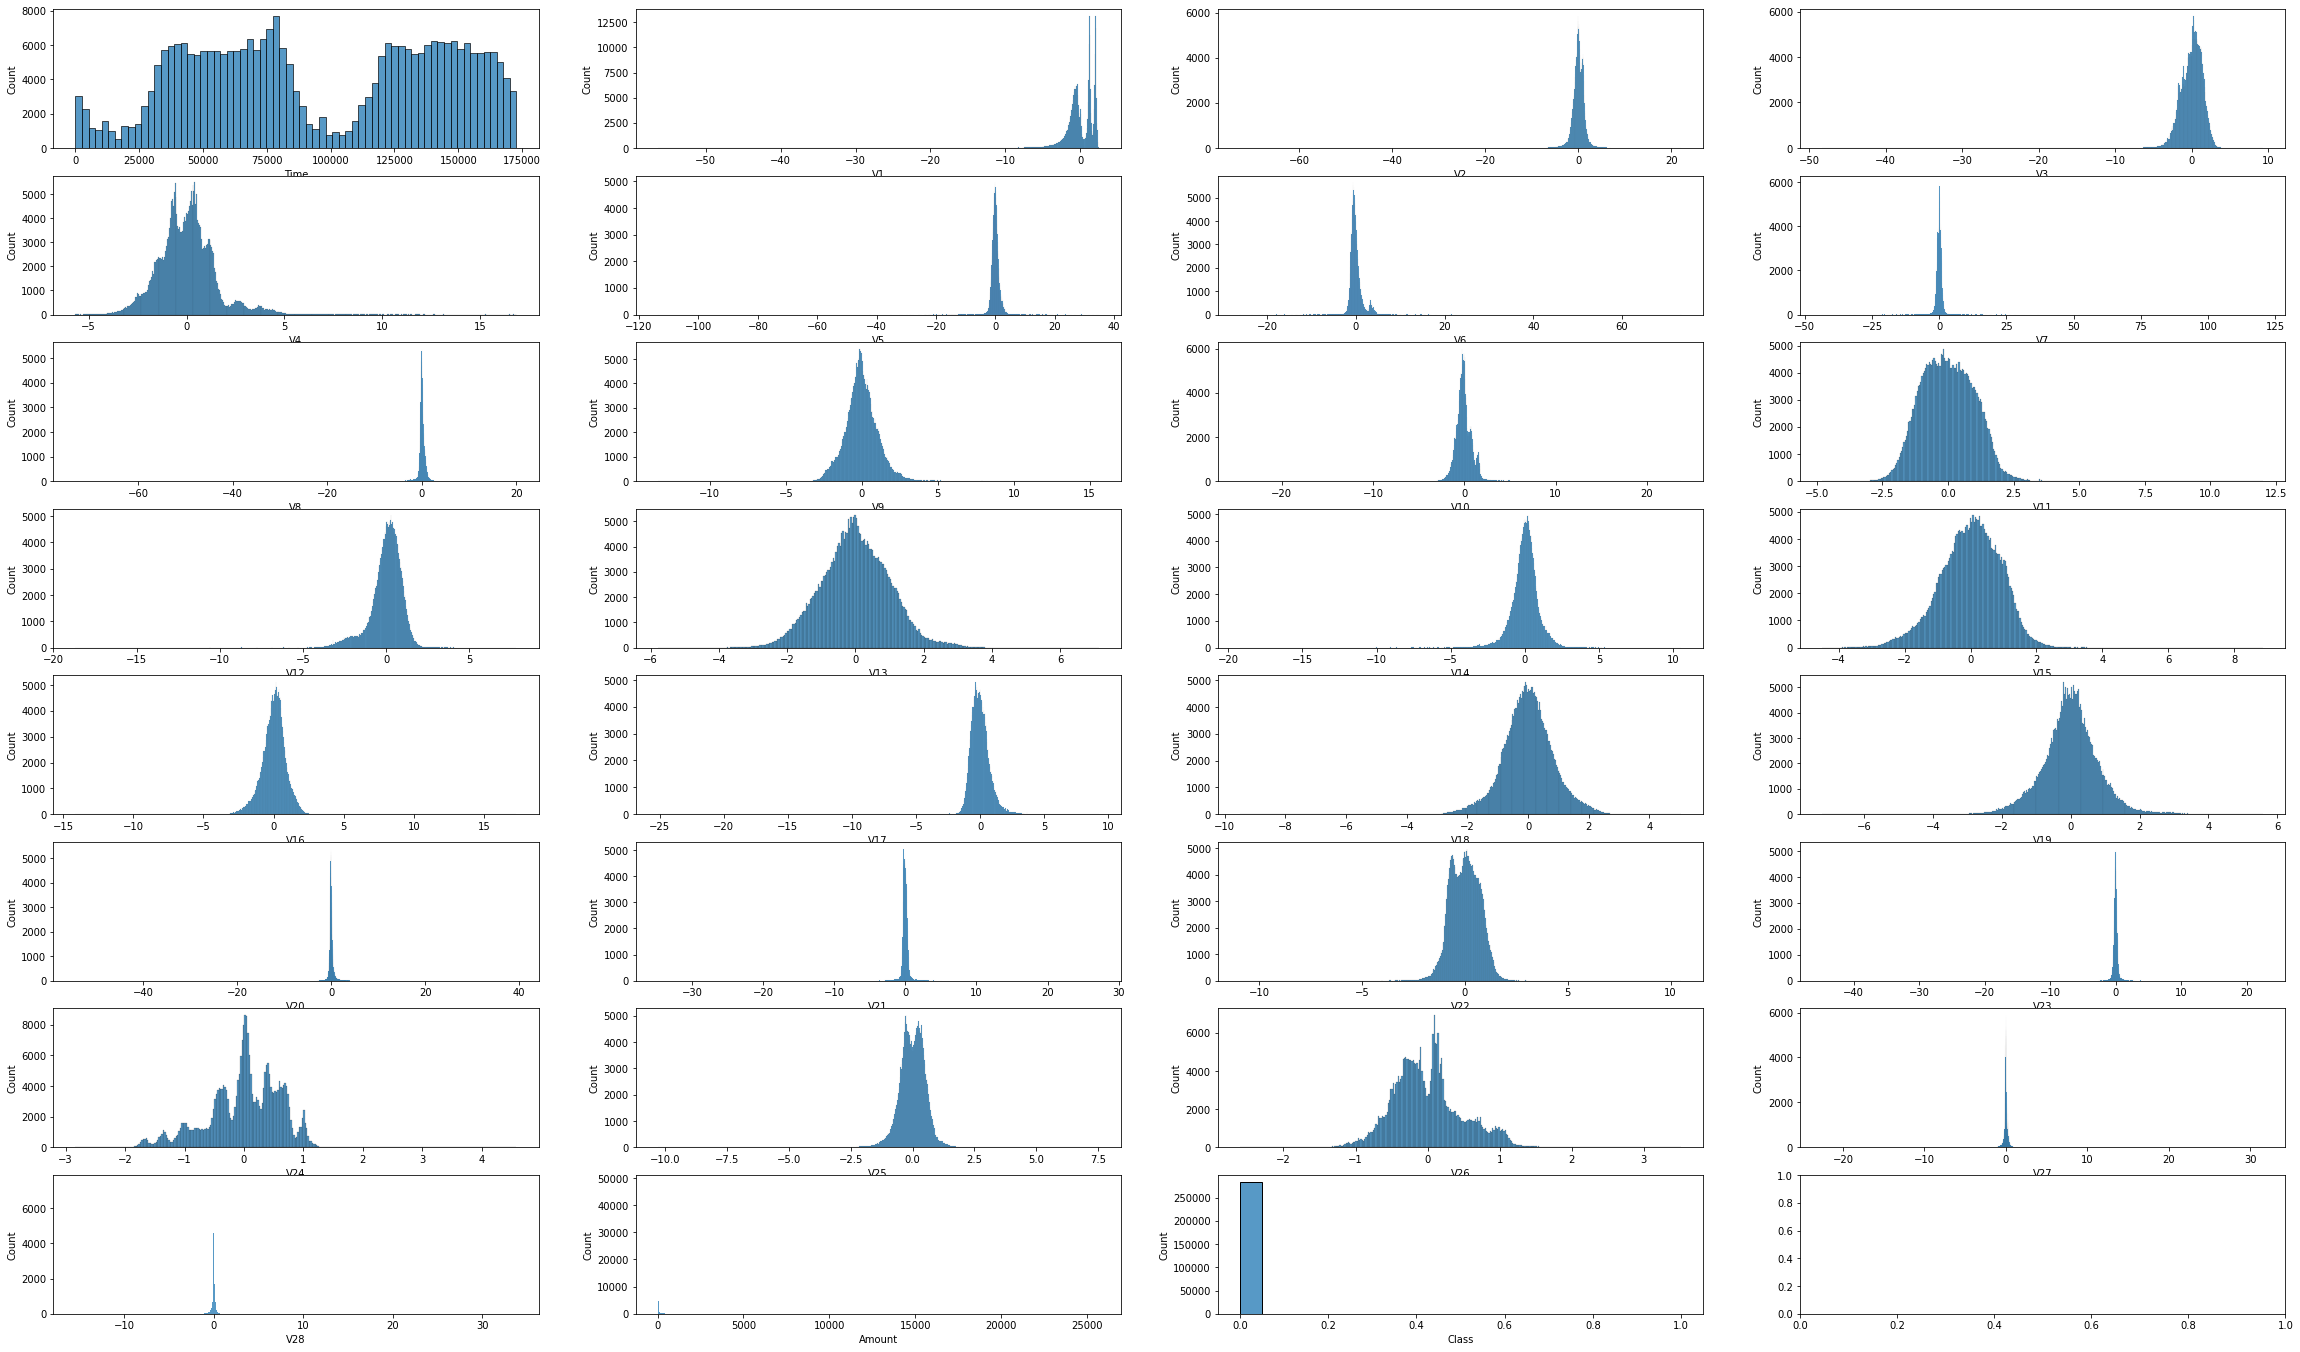

In [3]:
cols = list(X_train_full.columns)
cols_len = len(cols)

fig, axes = plt.subplots(nrows=cols_len//4+1, ncols=4,  figsize=(40,24))
for i in range(cols_len):
    sns.histplot(x=cols[i], data=X_train_full, ax=axes[i//4][i%4])

In [4]:
# найдем долю сомнительных транзакций

print(X_train_full['Class'].value_counts()/X_train_full.shape[0])
fraud_percentile = (X_train_full['Class'].value_counts()/X_train_full.shape[0])[1]

0    0.998273
1    0.001727
Name: Class, dtype: float64


In [5]:
# Оставим толшько PCA-фичи.
# Возможно Amount тоже полезен, но его пока оставим за скобками
# В таком случаем нам не нужно будет приводить данные к одному масштабу.

data = X_train_full.drop(columns = ['Class', 'Time', 'Amount']).copy()
is_fraud = X_train_full['Class']


<AxesSubplot:xlabel='V5', ylabel='V6'>

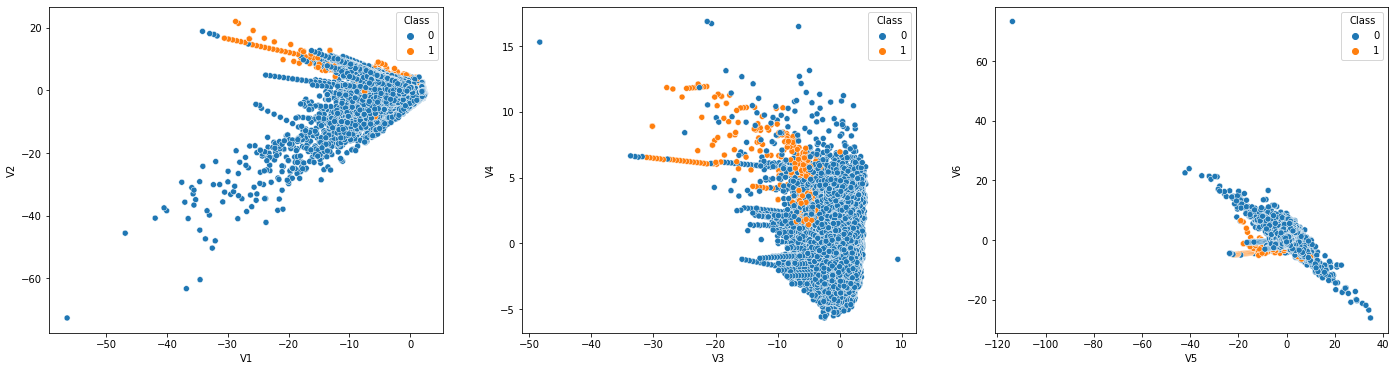

In [6]:
# Взглянем на реальных вредителей.
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(24,6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=is_fraud, ax=axes[0])
sns.scatterplot(x=data['V3'], y=data['V4'], hue=is_fraud, ax=axes[1])
sns.scatterplot(x=data['V5'], y=data['V6'], hue=is_fraud, ax=axes[2])

# Метод 3-сигмы

In [7]:
# безжаостный плагиат функций :)

def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data.index, name='is_outlier') 
    # data_features изменено на data
    
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))  

In [8]:
comparison_table, std_outliers = get_column_outliers(data)
anomalies_report(std_outliers)

Total number of outliers: 36636
Percentage of outliers:   12.86%


<AxesSubplot:xlabel='V5', ylabel='V6'>

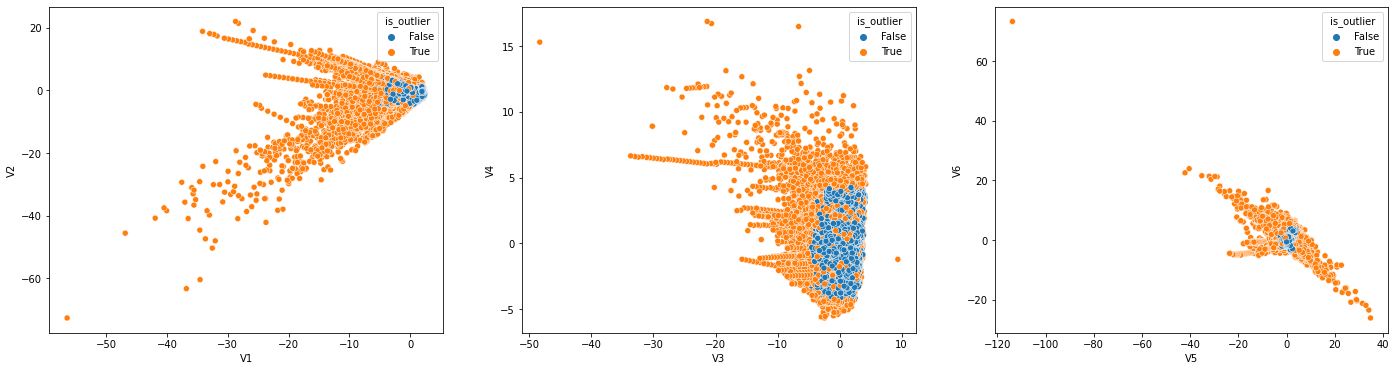

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(24,6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=std_outliers, ax=axes[0])
sns.scatterplot(x=data['V3'], y=data['V4'], hue=std_outliers, ax=axes[1])
sns.scatterplot(x=data['V5'], y=data['V6'], hue=std_outliers, ax=axes[2])

In [10]:
comparison_table

upper_bound  lower_bound  anomalies_count  anomalies_percentage
V27     1.210897    -1.210897           4771.0              1.675170
V6      3.996813    -3.996813           4652.0              1.633387
V20     2.312775    -2.312775           4645.0              1.630929
V2      4.953926    -4.953926           4318.0              1.516114
V8      3.583059    -3.583059           4221.0              1.482056
V21     2.203572    -2.203572           4064.0              1.426931
V1      5.876087    -5.876087           3701.0              1.299476
V10     3.266549    -3.266549           3488.0              1.224689
V7      3.711281    -3.711281           3401.0              1.194142
V19     2.442122    -2.442122           3399.0              1.193440
V12     2.997604    -2.997604           3393.0              1.191333
V14     2.875787    -2.875787           3380.0              1.186769
V23     1.873381    -1.873381           3364.0              1.181151
V28     0.990250    -0.990250           3264.0              1.146039
V4      4.247606    -4.247606           3094.0              1.086350
V5      4.140740    -4.140740           2945.0              1.034034
V25     1.563834    -1.563834           2809.0              0.986282
V17     2.548011    -2.548011           2515.0              0.883054
V9      3.295896    -3.295896           2293.0              0.805107
V16     2.628759    -2.628759           2077.0              0.729266
V3      4.548765    -4.548765           1987.0              0.697665
V18     2.514529    -2.514529           1685.0              0.591629
V15     2.745948    -2.745948           1254.0              0.440298
V22     2.177105    -2.177105           1222.0              0.429062
V13     2.985823    -2.985823           1192.0              0.418529
V26     1.446681    -1.446681           1047.0              0.367617
V11     3.062139    -3.062139            684.0              0.240163
V24     1.816941    -1.816941            657.0              0.230683

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(std_outliers, is_fraud))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93    248171
        True       0.90      0.01      0.02     36636

    accuracy                           0.87    284807
   macro avg       0.89      0.51      0.48    284807
weighted avg       0.88      0.87      0.82    284807



Метод нашёл на несколько порядеов выбросов болльше чем экспертная оценка 0.1727%.
И precision 0.01.
Для данной задачи метод явно не прменим.

# Персентилями

In [12]:
# С классическими усами резульат в данной хадаче получается не лучше чем у трех сигм.
# Попробуем отростить усы. Даже не усы, а усища)
# Если поиграть с прамертом threshold с целью получить процент выбросов соотвествующий
# экспертной оценке, получается неплохо.
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

comparison_table, iqr_outliers = get_column_outliers(data, function=outlier_iqr, threshold=33)
anomalies_report(iqr_outliers)

Total number of outliers: 579
Percentage of outliers:   0.20%


выбрасвыя один процент сверху и олдин процент мнизу получили долю выбросов, сопостовимую с экспертным мнением.

<AxesSubplot:xlabel='V5', ylabel='V6'>

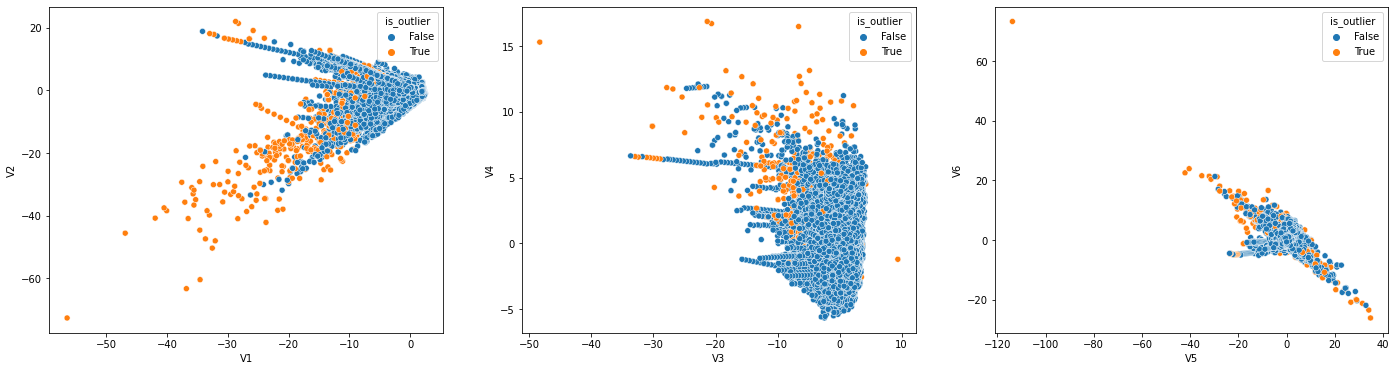

In [13]:
# немного визулизации
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(24,6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=iqr_outliers, ax=axes[0])
sns.scatterplot(x=data['V3'], y=data['V4'], hue=iqr_outliers, ax=axes[1])
sns.scatterplot(x=data['V5'], y=data['V6'], hue=iqr_outliers, ax=axes[2])

In [14]:
print(classification_report(iqr_outliers, is_fraud))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    284228
        True       0.04      0.04      0.04       579

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



Но показатель **precision** всё равно низкий.

# Distance-based

In [15]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [16]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=100*(1-fraud_percentile))
euclidian_model.fit(data)
euclidian_outliers = euclidian_model.predict(data)
anomalies_report(euclidian_outliers)

Total number of outliers: 492
Percentage of outliers:   0.17%


<AxesSubplot:xlabel='V5', ylabel='V6'>

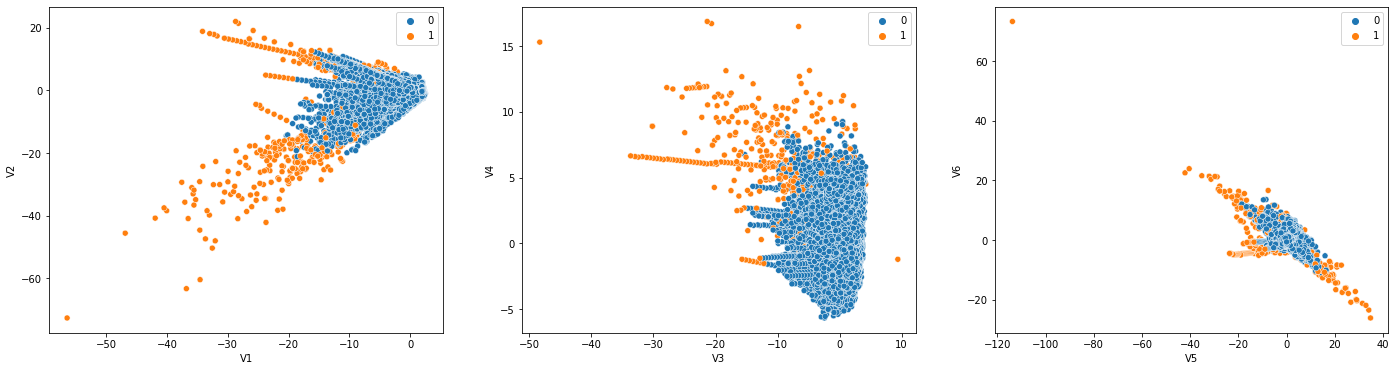

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(24,6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=euclidian_outliers, ax=axes[0])
sns.scatterplot(x=data['V3'], y=data['V4'], hue=euclidian_outliers, ax=axes[1])
sns.scatterplot(x=data['V5'], y=data['V6'], hue=euclidian_outliers, ax=axes[2])

In [18]:
print(classification_report(euclidian_outliers, is_fraud))
print("Real fraud:", is_fraud.value_counts()[1])
confusion_matrix(euclidian_outliers, is_fraud)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.23      0.23       492

    accuracy                           1.00    284807
   macro avg       0.61      0.61      0.61    284807
weighted avg       1.00      1.00      1.00    284807

Real fraud: 492


array([[283936,    379],
       [   379,    113]])

# Density-based

In [19]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
#eps = 2.8 # 0.05
#eps_history = [eps]
#while outlier_percentage>fraud_percentile:    
#    
#    model = DBSCAN(eps=eps).fit(data)
#    labels = model.labels_
#    num_clusters.append(len(np.unique(labels))-1)
#    labels = np.array([1 if label == -1 else 0 for label in labels])
#    # считаем текущий процент "шума"
#    outlier_percentage = sum(labels==1) / len(labels)
#    
#    print(eps, outlier_percentage)   
#    eps += 0.1 #0.05
#    eps_history.append(eps)
#    anomaly_percentage.append(outlier_percentage)



# При eps > 2.9 требует более 16GB оперативной памяти, что больше
# чем выделяется платформой Kaggle. Поэтому останавливаемся на нем.

eps = 2.9
model = DBSCAN(eps) 
model.fit(data)
density_outliers = np.array([1 if label == -1 else 0 for label in model.labels_]) 

In [20]:
anomalies_report(density_outliers)

Total number of outliers: 13169
Percentage of outliers:   4.62%


<AxesSubplot:xlabel='V5', ylabel='V6'>

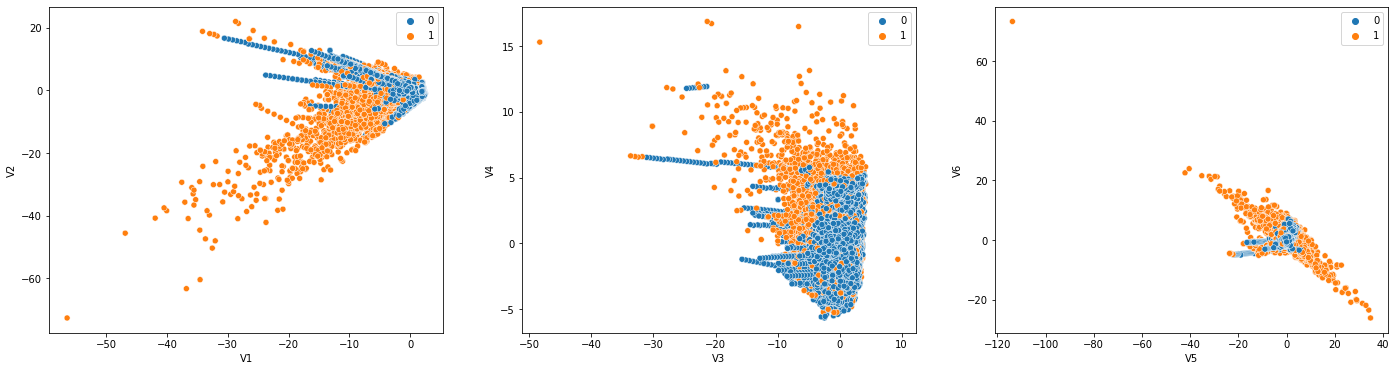

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(24,6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=density_outliers, ax=axes[0])
sns.scatterplot(x=data['V3'], y=data['V4'], hue=density_outliers, ax=axes[1])
sns.scatterplot(x=data['V5'], y=data['V6'], hue=density_outliers, ax=axes[2])

In [22]:
print(classification_report(euclidian_outliers, is_fraud))
print("Real fraud:", is_fraud.value_counts()[1])
confusion_matrix(density_outliers, is_fraud)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.23      0.23       492

    accuracy                           1.00    284807
   macro avg       0.61      0.61      0.61    284807
weighted avg       1.00      1.00      1.00    284807

Real fraud: 492


array([[271514,    124],
       [ 12801,    368]])

# One-Class SVM

In [23]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=fraud_percentile, gamma='auto')
one_class_svm.fit(data)
svm_outliers = one_class_svm.predict(data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [24]:
anomalies_report(svm_outliers)

Total number of outliers: 1360
Percentage of outliers:   0.48%


<AxesSubplot:xlabel='V5', ylabel='V6'>

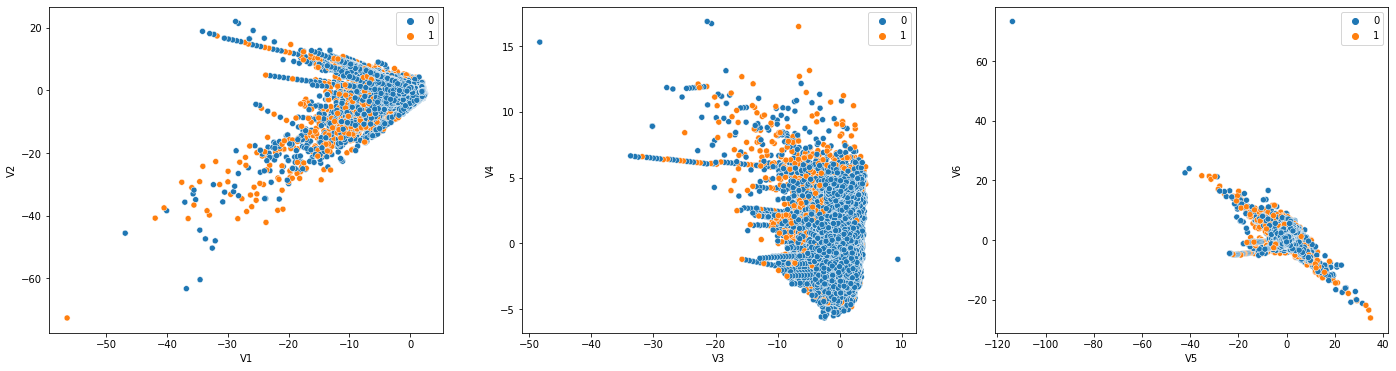

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(24,6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=svm_outliers, ax=axes[0])
sns.scatterplot(x=data['V3'], y=data['V4'], hue=svm_outliers, ax=axes[1])
sns.scatterplot(x=data['V5'], y=data['V6'], hue=svm_outliers, ax=axes[2])

In [26]:
print(classification_report(svm_outliers, is_fraud))
print("Real fraud:", is_fraud.value_counts()[1])
confusion_matrix(svm_outliers, is_fraud)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283447
           1       0.26      0.09      0.14      1360

    accuracy                           0.99    284807
   macro avg       0.63      0.55      0.57    284807
weighted avg       0.99      0.99      0.99    284807

Real fraud: 492


array([[283082,    365],
       [  1233,    127]])

# Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=fraud_percentile, 
                                   max_features=1.0, bootstrap=True, n_jobs=-1, random_state=42)
                                    #, behaviour="new")
isolation_forest.fit(data)

isolation_outliers = isolation_forest.predict(data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
anomalies_report(isolation_outliers)

Total number of outliers: 492
Percentage of outliers:   0.17%


<AxesSubplot:xlabel='V5', ylabel='V6'>

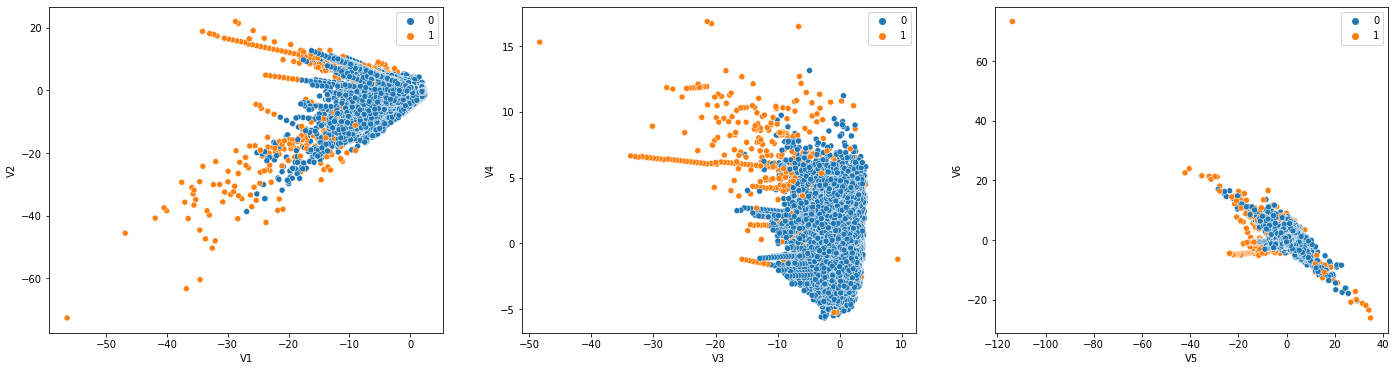

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(24,6))
sns.scatterplot(x=data['V1'], y=data['V2'], hue=isolation_outliers, ax=axes[0])
sns.scatterplot(x=data['V3'], y=data['V4'], hue=isolation_outliers, ax=axes[1])
sns.scatterplot(x=data['V5'], y=data['V6'], hue=isolation_outliers, ax=axes[2])

In [30]:
print(classification_report(isolation_outliers, is_fraud))
print("Real fraud:", is_fraud.value_counts()[1])
confusion_matrix(isolation_outliers, is_fraud)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.31      0.31       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807

Real fraud: 492


array([[283976,    339],
       [   339,    153]])

# Сравнение результатов

In [31]:
# ещё раз все вместе
from sklearn.metrics import recall_score
lbl = ['std_outliers', 'iqr_outliers', 'euclidian_outliers', 'density_outliers','svm_outliers', 'isolation_outliers']
for i, outliers in enumerate([std_outliers, iqr_outliers, euclidian_outliers, density_outliers, svm_outliers, isolation_outliers]):
    print(lbl[i])
    print(classification_report(outliers, is_fraud))

std_outliers
              precision    recall  f1-score   support

       False       0.87      1.00      0.93    248171
        True       0.90      0.01      0.02     36636

    accuracy                           0.87    284807
   macro avg       0.89      0.51      0.48    284807
weighted avg       0.88      0.87      0.82    284807

iqr_outliers
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    284228
        True       0.04      0.04      0.04       579

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

euclidian_outliers
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.23      0.23       492

    accuracy                           1.00    284807
   macro avg       0.61      0.61      0.61    284807
weighted avg       1.00      

**Isolation Forest** показал лучший recall и f1, при precision_n = 1 . В других случаях, когда precision_p высок, что достигается просто большим количесвом обнаруженных выбросов, при этом падает precision_n. При этом алгоритм имеет бодрую производительность.

Чуть хуже показал себя метод, основанный на расстоянии, но тоже неплохо.

**DBSCAN** оказался настолько прожерлив на ресурсы времени и памяти, что даже не смог в полной мере развернуться в рамках данной задачи на этом датасете.

# Визуализация UMAP

In [32]:
import umap

model = umap.UMAP(n_components=2, random_state=3)

data_tr = pd.DataFrame(model.fit_transform(data))


In [33]:
# данные для построения
data_2d = pd.DataFrame()
data_2d['umap_x'] = data_tr[0]
data_2d['umap_y'] = data_tr[1]
data_2d['std_outliers'] = std_outliers
data_2d['std_outliers'] = data_2d['std_outliers'].astype('int32')
data_2d['iqr_outliers'] = iqr_outliers
data_2d['iqr_outliers'] = data_2d['iqr_outliers'].astype('int32')
data_2d['euclidian_outliers'] = euclidian_outliers
data_2d['density_outliers'] = density_outliers
data_2d['svm_outliers'] = svm_outliers
data_2d['isolation_outliers'] = isolation_outliers
data_2d['real_outliers'] = is_fraud
data_2d.head()
#lbl

umap_x     umap_y  std_outliers  iqr_outliers  euclidian_outliers  \
0   4.153913   0.034648             0             0                   0   
1  12.159457  13.411489             0             0                   0   
2   3.514026   6.648325             1             0                   0   
3  -2.207436  -9.335202             0             0                   0   
4   4.124970  -0.335828             0             0                   0   

   density_outliers  svm_outliers  isolation_outliers  real_outliers  
0                 0             0                   0              0  
1                 0             0                   0              0  
2                 0             0                   0              0  
3                 0             0                   0              0  
4                 0             0                   0              0

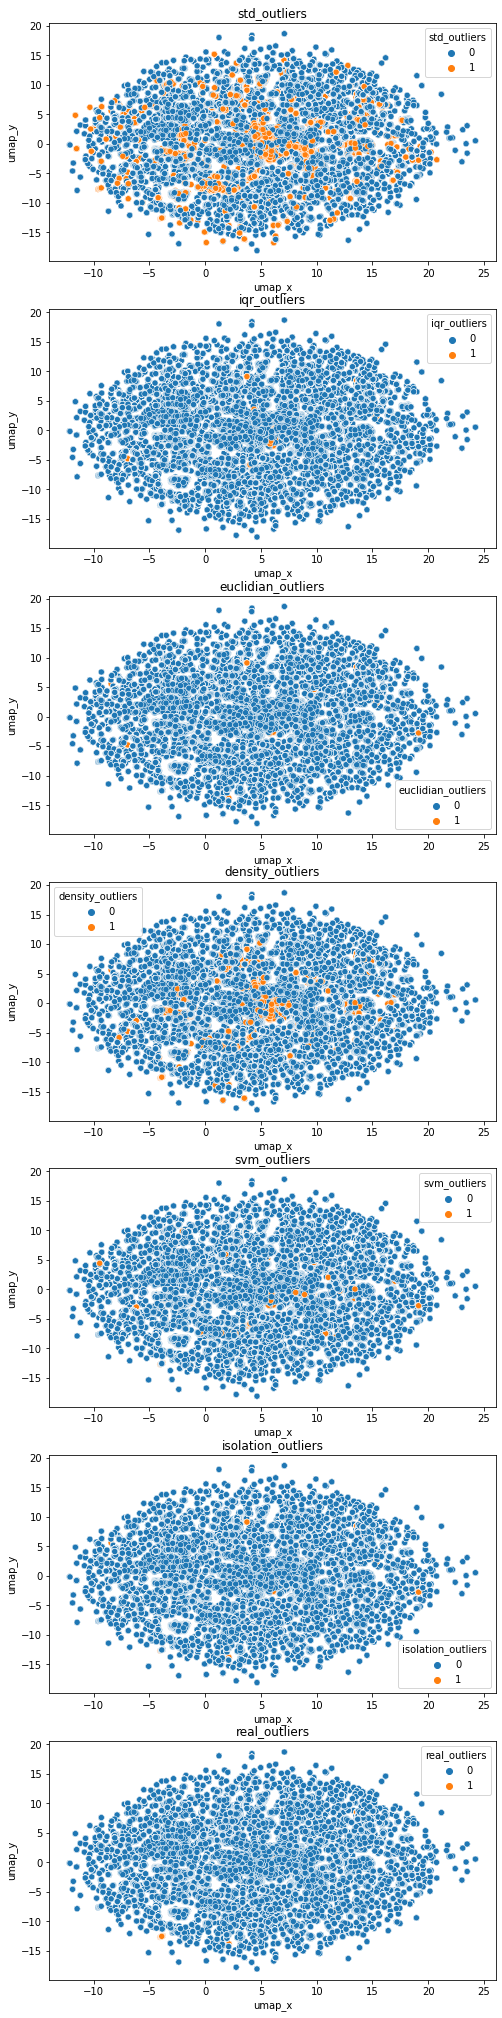

In [34]:
lbl = ['std_outliers', 'iqr_outliers', 'euclidian_outliers', 'density_outliers','svm_outliers', 'isolation_outliers','real_outliers']

fig, axes = plt.subplots(nrows=len(lbl), ncols=1, figsize=(8,36)) 
for k in range(len(lbl)): 
    sns.scatterplot(x=data_2d['umap_x'], y=data_2d['umap_y'], hue=data_2d[lbl[k]], ax=axes[k]) 
    axes[k].set_title(lbl[k])

In [35]:
!pip install MulticoreTSNE

  Preparing metadata (setup.py) ... - done
  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=64713 sha256=31c7f0fd6e1d5993ade784cb0b77294fd3d980788a0d1bc5e15bf2a0e26b95dc
  Stored in directory: /root/.cache/pip/wheels/80/47/df/c0d66e9f775f33281c422a1964de86a59c47f93bb8c37643e3
Successfully built MulticoreTSNE


In [36]:
from MulticoreTSNE import MulticoreTSNE as TSNE
model = TSNE(n_components=2, random_state=3, n_jobs=-1)
data_tr = pd.DataFrame(model.fit_transform(data))

In [37]:
data_2d['tsne_x'] = data_tr[0]
data_2d['tsne_y'] = data_tr[1]
data_2d.head()

umap_x     umap_y  std_outliers  iqr_outliers  euclidian_outliers  \
0   4.153913   0.034648             0             0                   0   
1  12.159457  13.411489             0             0                   0   
2   3.514026   6.648325             1             0                   0   
3  -2.207436  -9.335202             0             0                   0   
4   4.124970  -0.335828             0             0                   0   

   density_outliers  svm_outliers  isolation_outliers  real_outliers  \
0                 0             0                   0              0   
1                 0             0                   0              0   
2                 0             0                   0              0   
3                 0             0                   0              0   
4                 0             0                   0              0   

      tsne_x    tsne_y  
0  -4.080620  8.549395  
1 -14.586295  1.469338  
2  10.168885  2.480226  
3  11.784041  3.032198  
4  -3.469573  7.965099

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


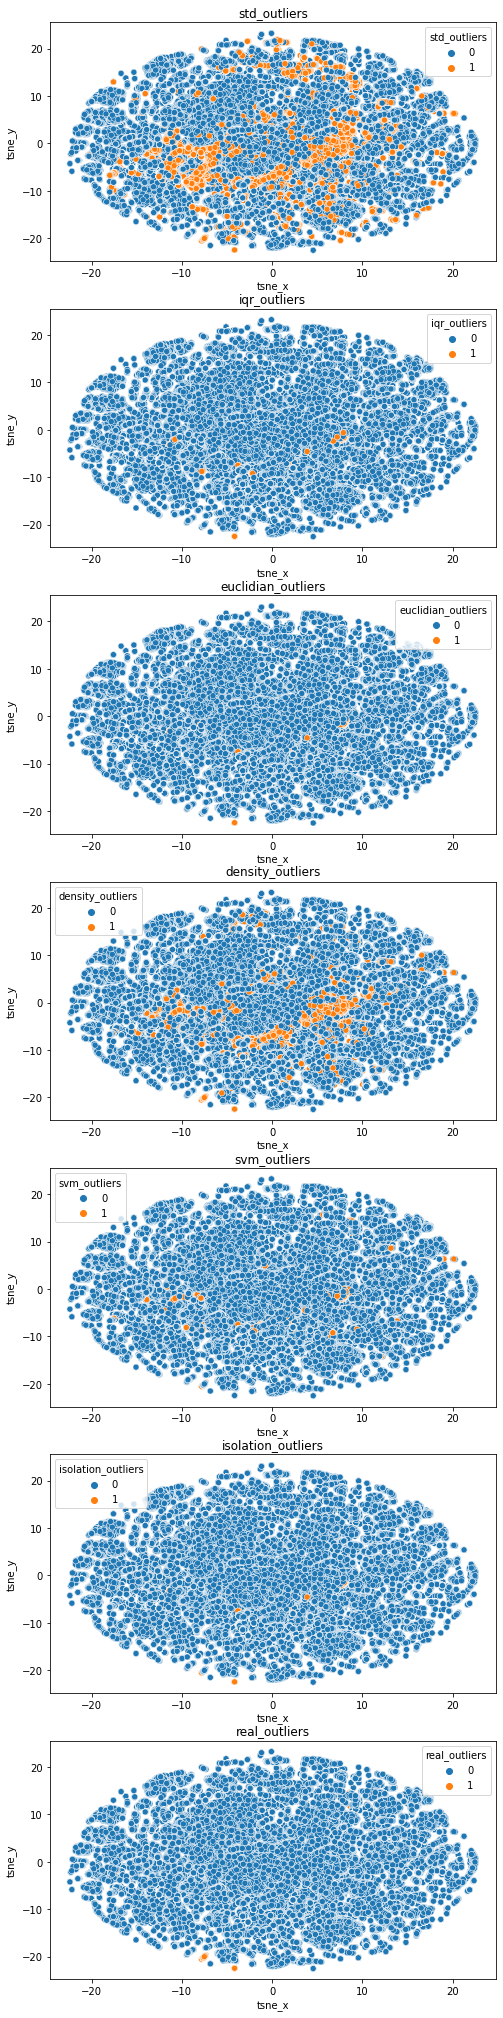

In [38]:
fig, axes = plt.subplots(nrows=len(lbl), ncols=1, figsize=(8,36)) 
for k in range(len(lbl)): 
    sns.scatterplot(x=data_2d['tsne_x'], y=data_2d['tsne_y'], hue=data_2d[lbl[k]], ax=axes[k]) 
    axes[k].set_title(lbl[k])